# 《合成孔径雷达成像——算法与实现》中3.3.2 非基带信号的匹配滤波

非基带信号可以视为零频时刻偏移脉冲中心的信号，这里脉冲持续时间T=7.24us，脉冲中心相对于零时刻偏移tc=1us。脉冲压缩将信号压缩到零频，但相位有一个线性频偏。

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fftshift,ifft,ifftshift

plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [6]:
T = 7.24e-6;               # % 信号持续时间
B = 5.8e6;                 # % 信号带宽
K = B/T;                   # % 调频率
ratio = 10;                # % 过采样率
Fs = ratio*B;              # % 采样频率
dt = 1/Fs;                 # % 采样间隔
N = int(np.ceil(T/dt));         #    % 采样点数
t = ((np.arange(N))-N/2)/N*T;     # % 时间轴flipud
t0 = 1e-6

st = np.exp(1j*np.pi*K*(t-t0)**2);    # % 生成信号
ht = np.conj(np.flipud(st));     # % 匹配滤波器
out = fftshift(ifft(fft(st)*fft(ht)));


In [7]:
Z = np.abs(out);
Z = Z/np.max(Z);
Z = 20*np.log10(np.finfo(float).eps+Z);


d:\anaconda3\envs\stock\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


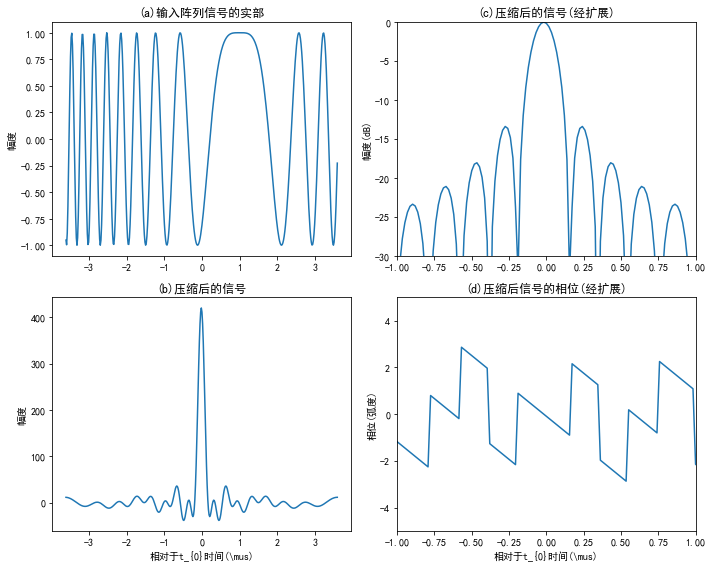

In [8]:
fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(t*1e6,np.real(st));
plt.title('(a)输入阵列信号的实部');plt.ylabel('幅度');
plt.subplot(2,2,2)
plt.plot(t*1e6,Z);plt.axis([-1,1,-30,0]);
plt.title('(c)压缩后的信号(经扩展)');plt.ylabel('幅度(dB)');
plt.subplot(2,2,3);
plt.plot(t*1e6,out);
plt.title('(b)压缩后的信号');plt.xlabel('相对于t_{0}时间(\mus)');plt.ylabel('幅度');
plt.subplot(2,2,4);
plt.plot(t*1e6,np.angle(out));plt.axis([-1,1,-5,5]);
plt.title('(d)压缩后信号的相位(经扩展)');plt.xlabel('相对于t_{0}时间(\mus)');plt.ylabel('相位(弧度)');
fig.tight_layout()
